# **[Excercise 5]** Thermodynamics & Grid Simulation
Troughout this notebook, we will cover the **first and second law of thermodynamics** and will also introduce the gas grid simulation software ***pandapipes*** that is freely available and can be used for **gas flow simulation**.

In this notebook we introduce the grid simulation software:
- [x] Pandapipes

In [1]:
%run installation.py ;

# a) Laws of Thermodynamics (Heat Pump)
The use of heat is subject to constraints which are described in the field of thermodynamics. In order to be able to optimally design processes in which heat is involved, the laws of thermodynamics must be taken into account. The thermodynamic laws will be applied using the example of an air source heat pump for a single-family home that is depicted in Figure 1 with the necessary specifications in Table 1.

![ASHP](../../datasets/mes/exercise_5/figures/air_source_heat_pump.png "Air source heat pump")

#### Specifications of the heat supply and the heat pump
_Hint_: $0 ° C = 273.15 K$

<center>

Specification | Index | Unit | Value
--- | --- | --- | ---
Demand: Heat flow | $\dot{Q}_{Hot}$ | [$kJ/min$] | 1200
Required target temperature | $T_{Hot}$ | [$° C$] | 23
Outside temperature | $T_{Cold}$ | [$° C$] | -10
Power input of the heat pump | $P_{el}^{HP}$ | [$kW_{el}$] | 8

</center>

In [2]:
params = {
    "heat_pump" : {
        "demand" : 1200,
        "T_out_C" : 23,
        "T_in_C" : -10,
        "P_in" : 8
    }
}

![Heat engine](../../datasets/mes/exercise_5/figures/heat_engine.png "Heat engine")

## Task 5.1 - Write a unit-conversion function
**Task description:** Write a function for converting Temperatures from the unit Celsius into Kelvin. It should take as input Celsius and the ouput should be in Kelvin, which conversion is further described by $f(T \ [\text{in} \ °C]) = T \ [\text{in} \ °C] +273.15 = T \ [\text{in} \ K]$. Please also update the given ``params`` dict and restore the new temperature in the variable ``T_out_K`` and ``T_in_K``.

$$ 0° \hat{=} 273.15 K $$

In [3]:
def celsius_to_kelvin(T_in_C: float) -> float:
    """
    Converts temperature from Celsius to Kelvin.

    Parameters:
        T_in_C (float): Temperature value in Celsius.

    Returns:
        float: Temperature value in Kelvin.
    """
    # The formula to convert Celsius to Kelvin is to add 273.15 to the Celsius value
    return T_in_C + 273.15

In [4]:
params.update({
    "heat_pump" : {
        "demand" : 1200,
        "T_out_K" : celsius_to_kelvin(params["heat_pump"]["T_out_C"]),
        "T_in_K" : celsius_to_kelvin(params["heat_pump"]["T_in_C"]),
        "P_in" : 8
    }
}
)
params

{'heat_pump': {'demand': 1200, 'T_out_K': 296.15, 'T_in_K': 263.15, 'P_in': 8}}

## Task 5.2 - Calculate coefficient of performance
**Task description:** Calculate the coefficient of performance of the heat pump.

$$ COP_{Ref} = \frac{\dot{Q}_{Hot}}{P} $$

__Hint__ : The COP is unitless, take a look at the units given and consider that $W=\frac{J}{s}$.

In [5]:
q_hot = (params["heat_pump"]["demand"] / 60)
cop = q_hot / params["heat_pump"]["P_in"]
cop

2.5

## Task 5.3 - Theoretical coefficient of performance
**Task description:** Calculate the theoretically highest efficiency as well as the cop of a heat engine with the given temperature levels.

Carnot efficiency:
$$ \eta_{Carnot} = \frac{P}{Q_{Hot}} = \frac{T_h-T_c}{T_h} $$

Reverse Carnot efficiency:

- Heating (e.g. heat pump) : $ \eta_{heating,max} = \frac{Q_{Hot}}{P} = \frac{1}{\eta_{Carnot}} = \frac{T_h}{T_h-T_c} $
- Cooling (e.g. refrigerator) : $ \eta_{cooling,max} = \frac{Q_{Cold}}{P} = \frac{T_c}{T_h-T_c} $

with $\frac{Q_{Cold}}{P} = \frac{Q_{Hot}-P}{P} = \frac{Q_{Hot}}{P} - 1 = \frac{T_h}{T_h-T_c} - 1 = \frac{T_h}{T_h-T_c} - \frac{T_h-T_c}{T_h-T_c} = \frac{T_c}{T_h-T_c}$

leading to

$$ COP_{Max} = \frac{T_h}{T_h-T_c} $$

In [6]:
eff_h = params["heat_pump"]["T_out_K"] / (params["heat_pump"]["T_out_K"]-params["heat_pump"]["T_in_K"])
eff_c = params["heat_pump"]["T_in_K"] / (params["heat_pump"]["T_out_K"]-params["heat_pump"]["T_in_K"])

cop_max_hot = eff_h
cop_max_hot

8.974242424242423

## Task 5.4 - First law of thermodynamics
**Task description:** Calculate the heat that is drawn from the air.

- First Law of Thermodynamics: Energy Conversion

The total energy of the system is converved. Any change in the internal energy $E$ must come from an external source: In the form of mechanical work $W$ performed on the system or in the form of thermal energy $Q$ transferred into the system. Hence, we can formulate the first law of thermodynamics:

$$ \Delta E = W + Q $$

If we take another look at the heat engine above, we can state this to:

$$ \dot{Q}_{Hot} = \dot{Q}_{Cold} + P $$
$$ \iff \dot{Q}_{Cold} = \dot{Q}_{Hot} - P $$

In [7]:
q_cold = q_hot - params["heat_pump"]["P_in"]
q_cold

12.0

## Task 5.5 - Second law of thermodynamics
**Task description:** Why is a heat flow from the cold to the warm reservoir not possible without applying power? Determine the change in entropy that would result from such a heat transfer of 20 kWh.

- Second Law of Thermodynamics: 

An isolated system with constant $N$ , $V$ , $E$ develops towards larger entropy, $\Delta S \geq 0$, and in equilibrium, the entropy is at its maximal value.

![Heat engine without power supply](../../datasets/mes/exercise_5/figures/no_power_supply.png "Heat engine without power supply")

In [8]:
try:
    Q = q_hot * 60 * 60

    S_hot = Q / params["heat_pump"]["T_out_K"]
    S_cold = - Q / params["heat_pump"]["T_in_K"]

    S_total = S_hot + S_cold

    assert S_total > 0
    
except Exception as e: 
    print("Second law of thermodynamics for closed, adiabatic systems:", S_total, "< 0")

Second law of thermodynamics for closed, adiabatic systems: -30.48816772624062 < 0


___
# b) Refrigerator
A refrigerator is also a heat engine that works reversely to a heat pump. Such heat circular processes require a refrigerant (e.g. R134a) which acts as a heat carrier. Within the circular process of the refrigerator, the state of the refrigerant varies. Different states of the refrigerant can be shown in a pressure-enthalpy- or ph-diagram that is given in Figure 2.

In the following, an exemplary refrigerator using the refrigerant R134a is examined which specifications are shown in Table 2. It keeps the refrigerated space at a temperature $T_{Cold}$ while waste heat $Q_{Hot}$ is rejected at the condenser portion of the system. The refrigerant has a constant mass flow rate $\dot{m}$. As the refrigerant passes through the condenser, its temperature and pressure change from $T_1$, $p_1$ to $T_2$, $p_2$. The compressor consumes a certain amount of power $P_{mech,el}$.

#### Specifications of the refrigerator
_Hint_: $0 ° C \hat{=} 273.15 K$ \
$1 bar \hat{=} 10^5Pa$

<center>

Specification | Index | Unit | Value
--- | --- | --- | ---
Refrigerated space | $\dot{T}_{Hot}$ | [$°C$] | -35
Refrigerant flow rate | $\dot{m}$ | [$kg/s$] | 0.05
Pressure before condenser | $p_1$ | [$MPa$] | 1.2
Temperature before condenser | $T_1$ | [$° C$] | 50
Pressure after condenser | $p_2$ | [$MPa$] | 1.2
Temperature after condenser | $T_2$ | [$° C$] | 45
Power compressor | $P_{mech,el}$ | [$kW_{el}$] | 3.3

</center>

In [9]:
params = {
    "refrigerator" : {
        "t_hot" : -35,
        "mass_flow" : 0.05,
        "P_in" : 1.2,
        "T_in_C" : 50,
        "P_out" : 1.2,
        "T_out_C" : 45,
        "P_el" : 3.3
    }
}

## Task 5.6
**Task description:** Convert the values given in $°C$ to $K$.

In [10]:
params.update({
    "refrigerator" : {
        "t_hot" : -35,
        "mass_flow" : 0.05,
        "P_in" : 1.2 * 1e6,
        "T_in_K" : celsius_to_kelvin(params["refrigerator"]["T_in_C"]),
        "P_out" : 1.2 * 1e6,
        "T_out_K" : celsius_to_kelvin(params["refrigerator"]["T_out_C"]),
        "P_el" : 3.3
    }
}
)

We determine the values for the enthalpy using the temperature and pressure for a given state for a given fluid from the library ``CoolProp``.

In [11]:
import CoolProp.CoolProp as CP
fluid = 'R134a'

# Specify the temperature and pressure to fix the state
h_1 = CP.PropsSI('H', 'T', params["refrigerator"]["T_in_K"], 'P', params["refrigerator"]["P_in"], fluid) / 1000

# Specify the temperature and pressure to fix the state
h_2 = CP.PropsSI('H', 'T', params["refrigerator"]["T_out_K"], 'P', params["refrigerator"]["P_out"], fluid) / 1000

## Task 5.7
**Task description:** Determine the waste heat $\dot{Q}_{Out}$ in $kW$ that is transformed out through the condenser.

- Conservation of Energy:

$$ H_1 = \dot{Q}_{Hot} + H_2 $$
$$ \dot{Q}_{Hot} = \dot{m} \cdot h_1 - \dot{m} \cdot h_2 $$
$$ \dot{Q}_{Hot} = \dot{m} \cdot (h_1 - h_2) $$

In [12]:
q_hot = params["refrigerator"]["mass_flow"] * (H_1 - H_2)
q_hot

8.12413712111936

## Task 5.8
Determine the heat which is transferred from the refrigerator space to the refrigerant (in $kW$).

$$ \dot{Q}_{Cold} + P = \dot{Q}_{Hot} $$

In [13]:
q_cold = q_hot - params["refrigerator"]["W_el"]
q_cold

4.824137121119359

## Task 5.9
Calculate the coefficient of performance of the refrigerator.

$$ COP_{Refrigerator} = \frac{\dot{Q}_{Cold}}{P} $$

In [14]:
COP_refrigerator = q_cold/params["refrigerator"]["W_el"]
COP_refrigerator

1.4618597336725332

## Bonus Task

A Pressure-Enthalpy diagram (P-H diagram) is a figure with a vertical axis of absolute pressure and a horizontal axis of specific enthalpy. It is an important diagram used frequently for a performance calculation of a refrigerating machine.

A P-H diagram is made respectively for a specified refrigerant. The [fluprodia](https://fluprodia.readthedocs.io/en/latest/usage.html) package can be used to create and customize such a diagram for a specific refrigerant. Your task is to use fluprodia to generate a ph-diagram for R134a.

Import the fluprodia and matplotlib packages and initialize the diagram. Desired unit for pressure is [MPa] and for enthalpy is [kJ/kg].

In [15]:
from fluprodia import FluidPropertyDiagram
import matplotlib.pyplot as plt

# Set units
unit_pressure = "MPa"
unit_enthalpy = "kJ/kg"

diagram = FluidPropertyDiagram('R134a')
diagram.set_unit_system(T='°C', p=unit_pressure, h=unit_enthalpy)

Calculate and plot the isolines.

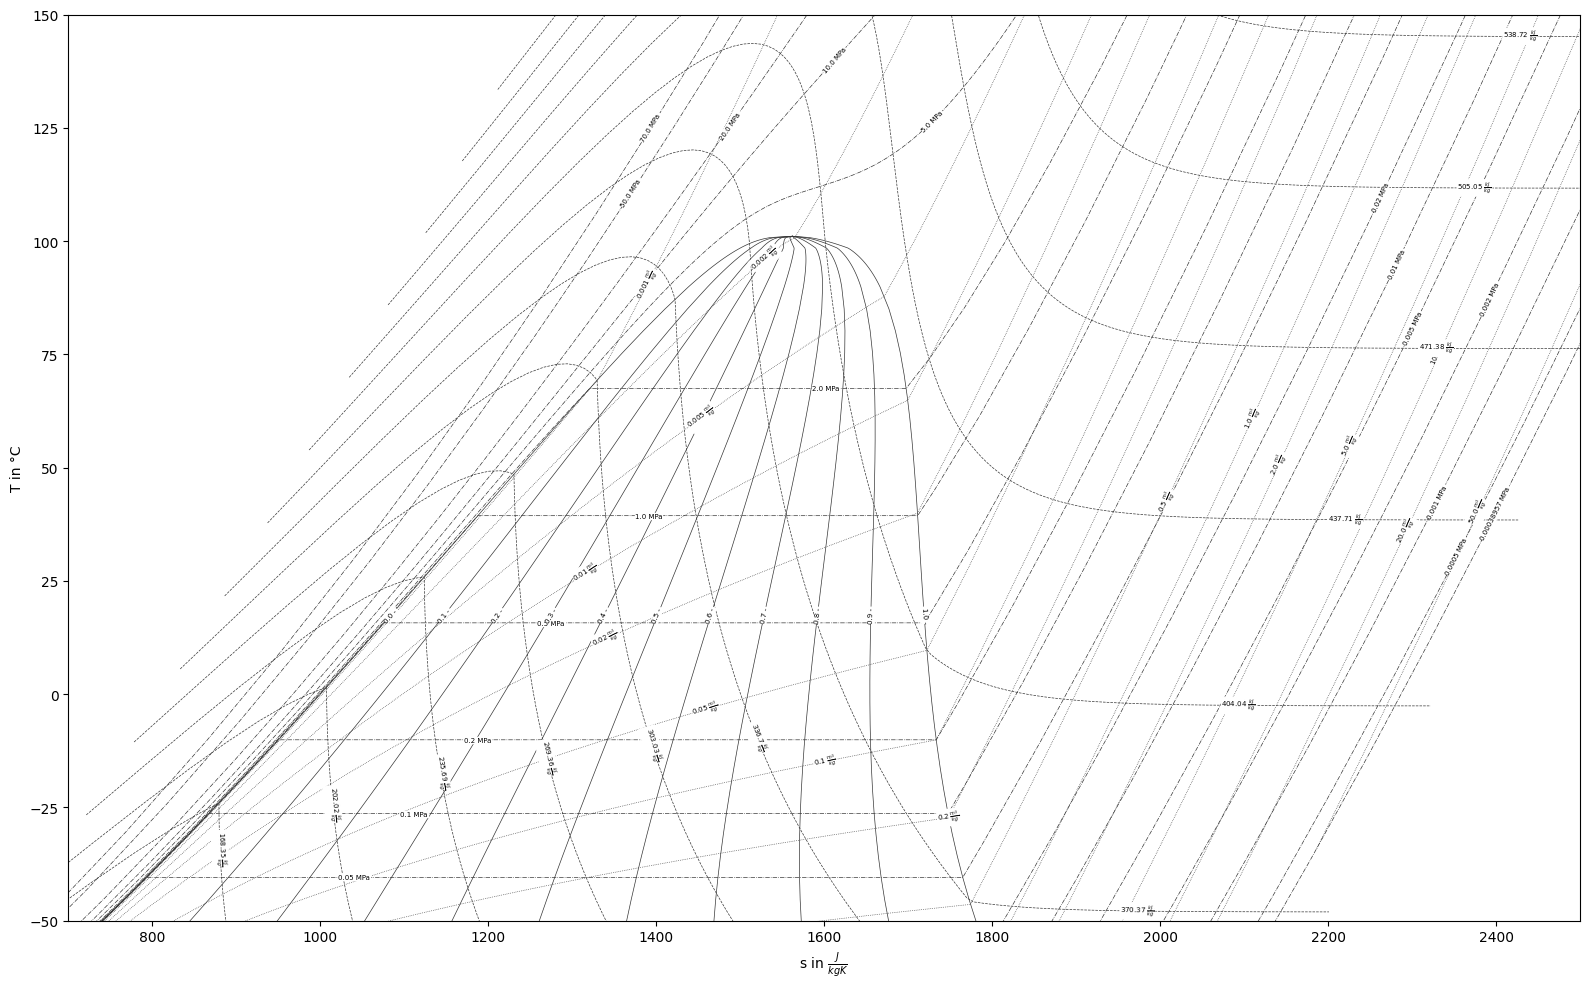

In [16]:
diagram.set_isolines()
diagram.calc_isolines()
fig, ax = plt.subplots(1, figsize=(16, 10))
diagram.draw_isolines(fig, ax, "Ts", x_min=700, x_max=2500, y_min=-50, y_max=150)
plt.tight_layout()

What's the state of the refrigerant ['liquid', 'gas' or 'mixed'] for h = 1400 [kJ/kg] and p = 25 [MPa]?

<div class="alert alert-block alert-success">
<b>Solution:</b> 'mixed'
</div>

___
# c) Simulation model of a District Heating Grid
In comparison to decentralised heat applications, it is possible to generate heat centrally and transport it to the demand via district heating grids. The behaviour of such heat networks is characterised by physical correlations and can be simulated in mathematical models.
Figure 3 shows a part of a heating grid that transports heated water via pipelines from a feeding station (External Grid) to Node 4 and Node 3 where it is further distributed. The feeding station provides pressure of 1bar and sufficient water to supply the water demand at node 3 and 4.

![District heating network](../../datasets/mes/exercise_5/figures/district_heating_network.png "District Heating network")

**Task description:** Import the package ``pandapipes`` for gas grid simulation.

In [17]:
import pandapipes

**Task description:** [Create an empty network](https://pandapipes.readthedocs.io/en/latest/components/empty_net/empty_network.html) and name and store it in ``net``. Create the fluid ``water`` and display the network using ``print(net)``.

In [18]:
# create empty network
net = pandapipes.create_empty_network("net")

# create fluid
pandapipes.create_fluid_from_lib(net, "water", overwrite=True)

net

This pandapipes network includes the following parameter tables:.
It contains the following fluid: 
Fluid water (liquid) with properties:
   - density (InterExtra)
   - viscosity (InterExtra)
   - heat_capacity (InterExtra)
   - molar_mass (Constant)
   - compressibility (Linear)
   - der_compressibility (Constant)
and uses the following component models:
   - Junction
   - Pipe
   - ExtGrid

**Task description:** [Create junctions](https://pandapipes.readthedocs.io/en/latest/components/junction/junction_component.html) as indicated in the above given figure. In total there should be 6 junctions with a defined temperature level of 290 K.

In [19]:
# create junctions
junction1 = pandapipes.create_junction(net, pn_bar=3, tfluid_k=290, name="Junction 1")
junction2 = pandapipes.create_junction(net, pn_bar=3, tfluid_k=290, name="Junction 2")
junction3 = pandapipes.create_junction(net, pn_bar=3, tfluid_k=290, name="Junction 3")
junction4 = pandapipes.create_junction(net, pn_bar=3, tfluid_k=290, name="Junction 4")

net.junction

name  pn_bar  tfluid_k  height_m  in_service      type
0  Junction 1     3.0     290.0       0.0        True  junction
1  Junction 2     3.0     290.0       0.0        True  junction
2  Junction 3     3.0     290.0       0.0        True  junction
3  Junction 4     3.0     290.0       0.0        True  junction

**Task description:** [Create an external grid](https://pandapipes.readthedocs.io/en/latest/components/ext_grid/ext_grid_component.html) as indicated in the above given figure. It should be connected to junction 1 with a pressure of $6 \ bar$.

In [20]:
# create external grid
pandapipes.create_ext_grid(net, junction=junction1, p_bar=6, t_k=363.15, name="External Grid", type="auto")
net.ext_grid

name  junction  p_bar     t_k  in_service type
0  External Grid         0    6.0  363.15        True   pt

**Task description:** [Create sinks](https://pandapipes.readthedocs.io/en/latest/components/sink/sink_component.html) as indicated in the above given figure. Connect them to the junctions 3 and 4 and set the massflow to $1 \frac{kg}{s}$.

In [21]:
# create sinks
pandapipes.create_sink(net, junction=junction3, mdot_kg_per_s=1, name="Sink 1")
pandapipes.create_sink(net, junction=junction4, mdot_kg_per_s=2, name="Sink 2")

net.sink

name  junction  mdot_kg_per_s  scaling  in_service  type
0  Sink 1         2            1.0      1.0        True  sink
1  Sink 2         3            2.0      1.0        True  sink

**Task description:** [Create pipes](https://pandapipes.readthedocs.io/en/latest/components/pipe/pipe_component.html) as indicated in the above given figure. Choose a diameter of (0.075, 0.05, 0.01) m respectively and 0.025 mm as the roughness factor. Assume a slightly higher ambient temperature of 298.15 K.

In [22]:
# create pipes
pandapipes.create_pipe_from_parameters(net, from_junction=junction1, to_junction=junction2, length_km=0.1,
                                       diameter_m=0.075, k_mm=0.025, sections=5, alpha_w_per_m2k=100,
                                       text_k=298.15, name="Pipe 1")

pandapipes.create_pipe_from_parameters(net, from_junction=junction2, to_junction=junction3, length_km=2,
                                       diameter_m=0.05, k_mm=0.025, sections=4, alpha_w_per_m2k=100,
                                       text_k=298.15, name="Pipe 2")

pandapipes.create_pipe_from_parameters(net, from_junction=junction2, to_junction=junction4, length_km=1,
                                       diameter_m=0.1, k_mm=0.025, sections=8, alpha_w_per_m2k=50,
                                       text_k=298.15, name="Pipe 3")

net.pipe

name  from_junction  to_junction std_type  length_km  diameter_m   k_mm   
0  Pipe 1              0            1     None        0.1       0.075  0.025  \
1  Pipe 2              1            2     None        2.0       0.050  0.025   
2  Pipe 3              1            3     None        1.0       0.100  0.025   

   loss_coefficient  alpha_w_per_m2k  text_k  qext_w  sections  in_service   
0               0.0            100.0  298.15     0.0         5        True  \
1               0.0            100.0  298.15     0.0         4        True   
2               0.0             50.0  298.15     0.0         8        True   

   type  
0  pipe  
1  pipe  
2  pipe

**Task description:** [Run a pipeflow](https://pandapipes.readthedocs.io/en/latest/pipeflow/run.html).

In [23]:
# run pipeflow
pandapipes.pipeflow(net, stop_condition="tol", iter=100, friction_model="colebrook",
                    mode="all", transient=False, nonlinear_method="automatic", tol_p=1e-4,
                    tol_v=1e-4)

In [24]:
net

This pandapipes network includes the following parameter tables:
   - junction (4 elements)
   - pipe (3 elements)
   - ext_grid (1 elements)
   - sink (2 elements)
and the following results tables:
   - res_junction (4 elements)
   - res_pipe (3 elements)
   - res_ext_grid (1 elements)
   - res_sink (2 elements).
It contains the following fluid: 
Fluid water (liquid) with properties:
   - density (InterExtra)
   - viscosity (InterExtra)
   - heat_capacity (InterExtra)
   - molar_mass (Constant)
   - compressibility (Linear)
   - der_compressibility (Constant)
and uses the following component models:
   - Junction
   - Pipe
   - ExtGrid
   - Sink

In [25]:
net.res_junction

p_bar         t_k
0  6.000000  363.150000
1  5.931409  352.033150
2  4.579414  298.150057
3  5.848753  306.338101

In [26]:
net.res_pipe

v_mean_m_per_s  p_from_bar  p_to_bar   t_from_k      t_to_k   
0        0.679915    6.000000  5.931409  363.15000  352.033150  \
1        0.509936    5.931409  4.579414  352.03315  298.150057   
2        0.254968    5.931409  5.848753  352.03315  306.338101   

   mdot_from_kg_per_s  mdot_to_kg_per_s  vdot_norm_m3_per_s      reynolds   
0                 3.0              -3.0            0.003096  47000.352334  \
1                 1.0              -1.0            0.001006  23500.176167   
2                 2.0              -2.0            0.002025  23500.176167   

     lambda  
0  0.022284  
1  0.026029  
2  0.025461

**Task description:** Add a new column which converts the temperature values to $°C$ and name it ``t_from_C`` and ``t_to_C`` respectively.

In [27]:
# add new column with temperature in Celsius
net.res_pipe['t_from_C'] = net.res_pipe['t_from_k'] - 273.15
net.res_pipe['t_to_C'] = net.res_pipe['t_to_k'] - 273.15
net.res_pipe

v_mean_m_per_s  p_from_bar  p_to_bar   t_from_k      t_to_k   
0        0.679915    6.000000  5.931409  363.15000  352.033150  \
1        0.509936    5.931409  4.579414  352.03315  298.150057   
2        0.254968    5.931409  5.848753  352.03315  306.338101   

   mdot_from_kg_per_s  mdot_to_kg_per_s  vdot_norm_m3_per_s      reynolds   
0                 3.0              -3.0            0.003096  47000.352334  \
1                 1.0              -1.0            0.001006  23500.176167   
2                 2.0              -2.0            0.002025  23500.176167   

     lambda  t_from_C     t_to_C  
0  0.022284  90.00000  78.883150  
1  0.026029  78.88315  25.000057  
2  0.025461  78.88315  33.188101